# Module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#from scipy.stats import uniform

# from imblearn.under_sampling import RandomUnderSampler

#from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

#from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

#from sklearn.linear_model import LogisticRegression, Ridge

from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.metrics import make_scorer, confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, log_loss

import matplotlib.pyplot as plt

import datetime

import warnings

warnings.filterwarnings('ignore')

#import torch

#from torch.utils.data import DataLoader, TensorDataset

# Rectified Dataset split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('drive/MyDrive/lendingclub/train_538132.csv')
val = pd.read_csv('drive/MyDrive/lendingclub/validation_179377.csv')
test = pd.read_csv('drive/MyDrive/lendingclub/test_179378.csv')

train = train.drop(['Unnamed: 0'], axis=1)
val = val.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

In [4]:
X_train = train.drop('depvar', axis=1)
y_train = train['depvar']

X_val = val.drop('depvar', axis=1)
y_val = val['depvar']

X_test = test.drop('depvar', axis=1)
y_test = test['depvar']

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(538132, 86)
(538132,)
(179377, 86)
(179377,)
(179378, 86)
(179378,)


# Training

## RandomForest
(K-fold cross validation -> K=cv)

In [7]:
rf_clf = RandomForestClassifier(max_depth=5, min_samples_split=20)

### param_grid (hyperparameter input)

In [8]:
# pipeline object에 대해 지정해줄 수 있는 hyperparameter를 얻을 수 있음
rf_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [9]:
# define the hyperparameters you want to search over
param_grid = {
    'n_estimators':[50,100,150],
    'max_features':['auto', 'sqrt', 'log2']
}

### Scoring Function

In [10]:
# Define the scorer to use in the grid search
# greater_is_better=False -> since we want the negative value of log loss
scoring = {'neg_log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
#            'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score),
#            'recall': make_scorer(recall_score),
#            'f1': make_scorer(f1_score)
          }

### Grid Search

In [11]:
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring=scoring, refit='neg_log_loss')
# scoring=scoring

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5,
                                              min_samples_split=20),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]},
             refit='neg_log_loss',
             scoring={'neg_log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)})

### Hyperparameter에 따른 Estimator 비교

In [12]:
# 저장된된 파일들의 모델 이름 정해주기
model_name = 'RandomForest_original'

In [13]:
# grid search 결과 df로 저장
df_result_ = pd.DataFrame(grid_search.cv_results_)

df_result_.to_csv('%s_estimator_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), index=True, float_format='%.6f') # 이름 설정해줘야함

df_result_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_neg_log_loss,split1_test_neg_log_loss,split2_test_neg_log_loss,split3_test_neg_log_loss,split4_test_neg_log_loss,mean_test_neg_log_loss,std_test_neg_log_loss,rank_test_neg_log_loss
0,18.808051,1.192312,0.521496,0.072632,auto,50,"{'max_features': 'auto', 'n_estimators': 50}",-0.432995,-0.433658,-0.432985,-0.433190,-0.433341,-0.433234,0.000250,4
1,36.374292,0.993493,1.021962,0.143105,auto,100,"{'max_features': 'auto', 'n_estimators': 100}",-0.433153,-0.433024,-0.433040,-0.433263,-0.433541,-0.433204,0.000189,1
2,56.643875,3.577508,1.528906,0.248252,auto,150,"{'max_features': 'auto', 'n_estimators': 150}",-0.433463,-0.433166,-0.433218,-0.433286,-0.433018,-0.433230,0.000146,3
3,17.893283,0.659463,0.483625,0.016756,sqrt,50,"{'max_features': 'sqrt', 'n_estimators': 50}",-0.433403,-0.433736,-0.433082,-0.433594,-0.433135,-0.433390,0.000254,6
4,36.602663,0.763346,0.956417,0.117169,sqrt,100,"{'max_features': 'sqrt', 'n_estimators': 100}",-0.433499,-0.433176,-0.433166,-0.433226,-0.433149,-0.433243,0.000130,5
5,54.087323,1.497477,1.645704,0.160341,sqrt,150,"{'max_features': 'sqrt', 'n_estimators': 150}",-0.433419,-0.433176,-0.433042,-0.433127,-0.433338,-0.433221,0.000139,2
6,13.199955,0.372014,0.595552,0.008399,log2,50,"{'max_features': 'log2', 'n_estimators': 50}",-0.435429,-0.435327,-0.434773,-0.435687,-0.435368,-0.435317,0.000299,9
7,26.119403,0.501875,1.095603,0.049642,log2,100,"{'max_features': 'log2', 'n_estimators': 100}",-0.434783,-0.434903,-0.435013,-0.435309,-0.434838,-0.434969,0.000186,7
8,40.058791,1.021483,1.571854,0.136718,log2,150,"{'max_features': 'log2', 'n_estimators': 150}",-0.434908,-0.435187,-0.435326,-0.435189,-0.435454,-0.435213,0.000182,8


# Validation

### best_estimator 확인

In [14]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_
print(best_estimator)

RandomForestClassifier(max_depth=5, max_features='auto', min_samples_split=20)


In [17]:
best_estimator.max_features

'auto'

### X_val에 대한 평가지표 확인

In [ ]:
pred_val = best_estimator.predict(X_val)
#dt = DecisionTreeClassifier()
#dt.fit(X_train, y_train)
#pred_val = dt.predict(X_val)


accuracy = accuracy_score(y_val, pred_val)
precision = precision_score(y_val, pred_val)
recall = recall_score(y_val, pred_val)
conf_matrix = confusion_matrix(y_val, pred_val)
print('\n 정확도: {0}, 정밀도도: {1}, 재현율율: {2}'.format(accuracy, precision, recall))
print(conf_matrix)


 정확도: 0.8379112149272203, 정밀도도: 0.0, 재현율율: 0.0
[[150302      0]
 [ 29075      0]]


### X_val fitting

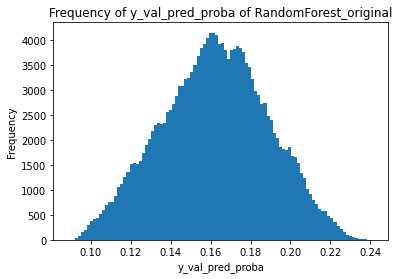

In [ ]:
# Predict probabilities for new data
y_val_pred_proba = best_estimator.predict_proba(X_val) # 확률로 추정된 X_val의 y_pred

plt.hist(y_val_pred_proba[:,1], bins=100)

plt.xlabel('y_val_pred_proba')
plt.ylabel('Frequency')
plt.title('Frequency of y_val_pred_proba of %s'%(model_name))

plt.savefig("%s_val_pre_proba_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

In [ ]:
y_val_pred_proba

array([[0.77853756, 0.22146244],
       [0.84425821, 0.15574179],
       [0.83647061, 0.16352939],
       ...,
       [0.82966607, 0.17033393],
       [0.84970965, 0.15029035],
       [0.82026706, 0.17973294]])

### optimal threshold 선정 (threshold에 따른 목적함수 값 비교)

실제 positive = TP + FN

실제 Negative = TN + FP

정밀도: positive로 예측한 것 중에 진짜 positive인 것 -> 양성 예측도

재현율: 실제 positive 중에 맞춘 것 -> 민감도

In [ ]:
threshold_list = np.linspace(0.10,0.20,20) # 짝수개 값 (예시 10개)

Threshold에 따른 지표 비교

0, 1 count / confusion_matrix / accuracy, precision, recall, f1 score 

In [ ]:
def threshold_func(y_val, y_pred_proba, threshold_list):
    
    n = len(threshold_list)
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])
    
    fig, axes = plt.subplots(nrows=int(n/2), ncols=2, figsize=(10, 10))
    
    for i in range(len(threshold_list)):
        
        threshold = threshold_list[i]
        
        # make Binarizer(y hat)
        binarizer = Binarizer(threshold = threshold).fit(y_pred_proba[:,1].reshape(-1,1))
        custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))
        
        # count 0, 1 in Binarizer(y hat)
        unique, counts = np.unique(custom_predict, return_counts=True)

        for val, count in zip(unique, counts):
            if len(unique) == 1:
                if val == 1.0:
                    num_0_pred = 0
                    num_1_pred = count
                elif val == 0.0:
                    num_1_pred = 0
                    num_0_pred = count
            if val == 1.0:
                num_1_pred = count
            elif val == 0.0:
                num_0_pred = count

        # count 0, 1 in y hat
        num_0_real = y_val.value_counts()[0]
        num_1_real = y_val.value_counts()[1]
        
        tn, fp, fn, tp = confusion_matrix(y_val, custom_predict).ravel()
        count = [tn, fp, fn, tp]
        tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]
        
        accuracy = round((tp+tn)/(tp+tn+fp+fn),4)
        precision = round(tp/(tp+fp),4)
        recall = round(tp/(tp+fn),4)
        f1 = round(2*(precision*recall)/(precision+recall),4)
        
        threshold_tag = round(threshold_list[i], 4)
        
        result_df[threshold_tag] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]
        
        labels = ['TN','FP','FN','TP']
        
        # tn, fp, fn, tp 각각의 값을 counts 리스트에 저장
        counts = [tn, fp, fn, tp]

        # 해당하는 subplot에 그래프 그리기
        axes[i//2, i%2].bar(labels, counts)
        axes[i//2, i%2].set_title(threshold_tag)
        axes[i//2, i%2].set_ylabel('Count')

    # 그래프 간격 조절하기
    plt.tight_layout()
    
    plt.savefig("%s_threshold_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

    # 그래프 출력하기
    plt.show()
    
    result_df.to_csv('%s_threshold_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), index=True)
    
    return result_df

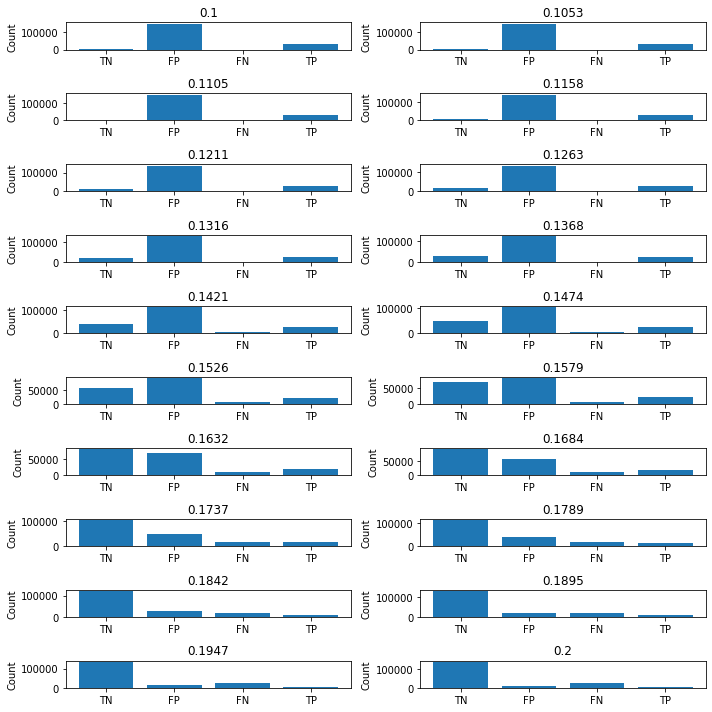

,0.1000,0.1053,0.1105,0.1158,0.1211,0.1263,0.1316,0.1368,0.1421,0.1474,0.1526,0.1579,0.1632,0.1684,0.1737,0.1789,0.1842,0.1895,0.1947,0.2000
1_real,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000
1_pred,178516.0000,177014.0000,174695.0000,171461.0000,166795.0000,161324.0000,154487.0000,146533.0000,137583.0000,127210.0000,115708.0000,102593.0000,88372.0000,74949.0000,61957.0000,49074.0000,38147.0000,28878.0000,21440.0000,15128.0000
0_real,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000
0_pred,861.0000,2363.0000,4682.0000,7916.0000,12582.0000,18053.0000,24890.0000,32844.0000,41794.0000,52167.0000,63669.0000,76784.0000,91005.0000,104428.0000,117420.0000,130303.0000,141230.0000,150499.0000,157937.0000,164249.0000
tn,842.0000,2286.0000,4485.0000,7544.0000,11903.0000,17001.0000,23285.0000,30485.0000,38453.0000,47632.0000,57708.0000,68996.0000,81016.0000,92219.0000,102860.0000,113198.0000,121835.0000,129057.0000,134713.0000,139502.0000
fp,149460.0000,148016.0000,145817.0000,142758.0000,138399.0000,133301.0000,127017.0000,119817.0000,111849.0000,102670.0000,92594.0000,81306.0000,69286.0000,58083.0000,47442.0000,37104.0000,28467.0000,21245.0000,15589.0000,10800.0000
fn,19.0000,77.0000,197.0000,372.0000,679.0000,1052.0000,1605.0000,2359.0000,3341.0000,4535.0000,5961.0000,7788.0000,9989.0000,12209.0000,14560.0000,17105.0000,19395.0000,21442.0000,23224.0000,24747.0000
tp,29056.0000,28998.0000,28878.0000,28703.0000,28396.0000,28023.0000,27470.0000,26716.0000,25734.0000,24540.0000,23114.0000,21287.0000,19086.0000,16866.0000,14515.0000,11970.0000,9680.0000,7633.0000,5851.0000,4328.0000
tn_%,0.5000,1.3000,2.5000,4.2000,6.6000,9.5000,13.0000,17.0000,21.4000,26.6000,32.2000,38.5000,45.2000,51.4000,57.3000,63.1000,67.9000,71.9000,75.1000,77.8000
fp_%,83.3000,82.5000,81.3000,79.6000,77.2000,74.3000,70.8000,66.8000,62.4000,57.2000,51.6000,45.3000,38.6000,32.4000,26.4000,20.7000,15.9000,11.8000,8.7000,6.0000


In [ ]:
threshold_func(y_val, y_val_pred_proba, threshold_list)

Threshold에 따른 목적함수 값 비교

In [ ]:
OPT_threshold = None
OPT_expected_loss = None

def objective_func(y_pred_proba, threshold_list):
    
        result_df = pd.DataFrame(index=['1-TPR','FPR','w1_1-TPR','w2_FPR','Expected_loss'])
        
        expected_loss_list = []
        
        for i in range(len(threshold_list)):
            
            threshold = threshold_list[i]
            
            # make Binarizer(y hat)
            binarizer = Binarizer(threshold = threshold).fit(y_pred_proba[:,1].reshape(-1,1))
            custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

            tn, fp, fn, tp = confusion_matrix(y_val, custom_predict).ravel()
            count = [tn, fp, fn, tp]
            
            tpr_1 = fn / (fn + tp)
            fpr = fp / (fp + tn)
            w1 = 0.55
            w2 = 0.45
            
            expected_loss = w1 * tpr_1 + w2 * fpr
            
            expected_loss_list.append(expected_loss)
            
            threshold_tag = round(threshold_list[i], 4)
        
            result_df[threshold_tag] = [tpr_1, fpr, w1*tpr_1, w2*fpr, expected_loss]
            
            if i == 0:
                opt_threshold = threshold
                opt_expected_loss = expected_loss
            else:
                if opt_expected_loss > expected_loss:
                    opt_threshold = threshold
                    opt_expected_loss = expected_loss
                    
#         expected_loss_list = [round(x, 1) for x in expected_loss_list]

        print(opt_threshold)
        print(opt_expected_loss)
        
        plt.plot(threshold_list, expected_loss_list)
        plt.scatter(threshold_list, expected_loss_list)
        
        plt.xlabel('Threshold')
        plt.ylabel('Expected_Loss')
        plt.title('Expected Loss of Thresholds of %s'%(model_name))

        plt.savefig("%s_expected_loss_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
        
        plt.show()
        
        global OPT_threshold
        OPT_threshold = opt_threshold
        global OPT_expected_loss
        OPT_expected_loss = opt_expected_loss
        
        result_df.to_csv('%s_expected_loss_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), float_format='%.3f', index=True)
        
        return result_df

0.15263157894736842
0.3899856788418635


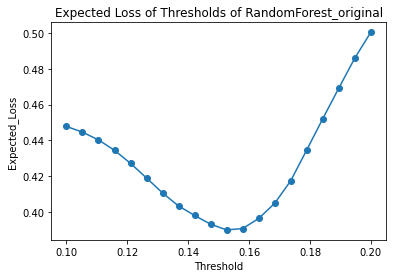

,0.1000,0.1053,0.1105,0.1158,0.1211,0.1263,0.1316,0.1368,0.1421,0.1474,0.1526,0.1579,0.1632,0.1684,0.1737,0.1789,0.1842,0.1895,0.1947,0.2000
1-TPR,0.000653,0.002648,0.006776,0.012794,0.023353,0.036182,0.055202,0.081135,0.114910,0.155976,0.205021,0.267859,0.343560,0.419914,0.500774,0.588306,0.667068,0.737472,0.798762,0.851144
FPR,0.994398,0.984791,0.970160,0.949808,0.920806,0.886888,0.845079,0.797175,0.744162,0.683091,0.616053,0.540951,0.460979,0.386442,0.315645,0.246863,0.189399,0.141349,0.103718,0.071855
w1_1-TPR,0.000359,0.001457,0.003727,0.007037,0.012844,0.019900,0.030361,0.044624,0.063200,0.085787,0.112762,0.147322,0.188958,0.230953,0.275426,0.323568,0.366887,0.405610,0.439319,0.468129
w2_FPR,0.447479,0.443156,0.436572,0.427413,0.414363,0.399099,0.380285,0.358729,0.334873,0.307391,0.277224,0.243428,0.207440,0.173899,0.142040,0.111088,0.085229,0.063607,0.046673,0.032335
Expected_loss,0.447838,0.444612,0.440299,0.434450,0.427207,0.419000,0.410646,0.403353,0.398073,0.393178,0.389986,0.390750,0.396398,0.404852,0.417466,0.434657,0.452117,0.469217,0.485992,0.500464


In [ ]:
objective_func(y_val_pred_proba, threshold_list)

# 더 세밀한 범위에서 optimal threshold를 잡고싶으면 한 번 더 다시 실행

In [ ]:
OPT_threshold

0.15263157894736842

histogram에 optimal threshold 표시

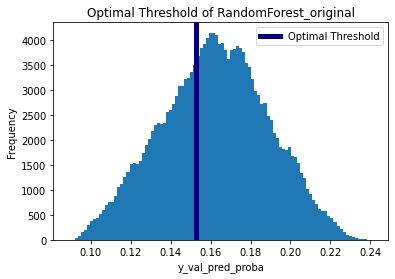

In [ ]:
plt.hist(y_val_pred_proba[:,1], bins=100)

plt.axvline(x=OPT_threshold, color='navy', linewidth=5, label='Optimal Threshold')

plt.xlabel('y_val_pred_proba')
plt.ylabel('Frequency')
plt.title('Optimal Threshold of %s'%(model_name))
plt.legend()

plt.savefig("%s_opt_threshold_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

# Test 

### X_test fitting

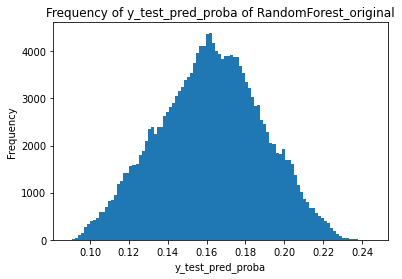

In [ ]:
# Predict probabilities for new data
y_test_pred_proba = best_estimator.predict_proba(X_test) # 확률로 추정된 X_test의 y_pred

plt.hist(y_test_pred_proba[:,1], bins=100)

plt.xlabel('y_test_pred_proba')
plt.ylabel('Frequency')
plt.title('Frequency of y_test_pred_proba of %s'%(model_name))

plt.savefig("%s_test_pre_proba_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_test_pred_proba의 분포 확인

### 0, 1 count / confusion_matrix / accuracy, precision, recall, f1 score 

In [ ]:
def test_func(y_test, y_pred_proba, opt_threshold):
        
    # make Binarizer(y hat)
    binarizer = Binarizer(threshold = opt_threshold).fit(y_pred_proba[:,1].reshape(-1,1))
    custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

    # count 0, 1 in Binarizer(y hat)
    unique, counts = np.unique(custom_predict, return_counts=True)

    for val, count in zip(unique, counts):
        if len(unique) == 1:
            if val == 1.0:
                num_0_pred = count
                num_1_pred = 0
            elif val == 0.0:
                num_1_pred = count
                num_0_pred = 0
        if val == 1.0:
            num_0_pred = count
        elif val == 0.0:
            num_1_pred = count

    # count 0, 1 in y hat
    num_1_real = y_test.value_counts()[0]
    num_0_real = y_test.value_counts()[1]

    tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
    count = [tn, fp, fn, tp]
    tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]

    accuracy = round((tp+tn)/(tp+tn+fp+fn),4)
    precision = round(tp/(tp+fp),4)
    recall = round(tp/(tp+fn),4)
    f1 = round(2*(precision*recall)/(precision+recall),4)
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

    result_df['result'] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]

    labels = ['TN','FP','FN','TP']


    # 혼동 행렬 시각화
    labels = ['Positive', 'Negative']
    cm = [[tp, fn], [fp, tn]]

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Acutual Class')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_title('%s Confusion Matrix'%(model_name))
    
    ax.text(0.45, 1.40, 'FP', fontsize=12, color='red')
    ax.text(1.45, 1.40, 'TN', fontsize=12, color='red')
    ax.text(0.45, 0.40, 'TP', fontsize=12, color='red')
    ax.text(1.45, 0.40, 'FN', fontsize=12, color='red')
    
    plt.savefig("%s_Confusion_Matrix_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
    plt.show()
    
    result_df.T.to_csv('%s_test.csv'%(model_name), index=True)

    return result_df.T

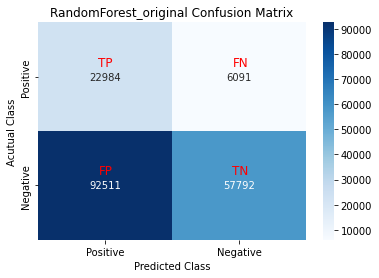

,1_real,1_pred,0_real,0_pred,tn,fp,fn,tp,tn_%,fp_%,fn_%,tp_%,Accuracy,Precision,Recall,F1 score
result,150303.0,63883.0,29075.0,115495.0,57792.0,92511.0,6091.0,22984.0,32.2,51.6,3.4,12.8,0.4503,0.199,0.7905,0.318


In [ ]:
test_func(y_test, y_test_pred_proba, OPT_threshold)

### Objective Function

In [ ]:
def test_objective_func(y_test, y_pred_proba, threshold):
    
        result_df = pd.DataFrame(index=['1-TPR','FPR','w1_1-TPR','w2_FPR','Expected_loss'])
            
        # make Binarizer(y hat)
        binarizer = Binarizer(threshold = threshold).fit(y_pred_proba[:,1].reshape(-1,1))
        custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

        tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
        count = [tn, fp, fn, tp]

        tpr_1 = fn / (fn + tp)
        fpr = fp / (fp + tn)
        w1 = 0.55
        w2 = 0.45

        expected_loss = w1 * tpr_1 + w2 * fpr

        result_df[threshold] = [tpr_1, fpr, w1*tpr_1, w2*fpr, expected_loss]

        print(expected_loss)
        
        result_df.T.to_csv('%s_test_expected_loss_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), float_format='%.6f', index=True)
        
        return result_df

In [ ]:
test_objective_func(y_test, y_test_pred_proba, OPT_threshold)

0.3921944937262843


,0.152632
1-TPR,0.209493
FPR,0.615497
w1_1-TPR,0.115221
w2_FPR,0.276974
Expected_loss,0.392194


### ROC curve

거짓 양성 비율(FPR, 1-TNR:1-특이도)에 대한 진짜 양성 비율(TPR, 재현율)의 곡선

정밀도: positive로 예측한 것 중에 진짜 positive인 것 -> 양성 예측도

재현율: 실제 positive 중에 맞춘 것 -> 민감도

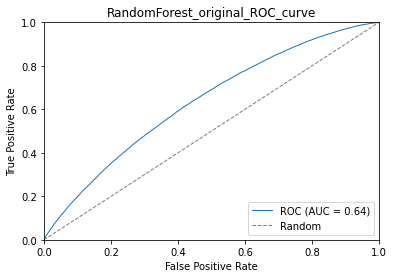

In [ ]:
# Generate ROC curve and AUC score for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1, label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s_ROC_curve'%(model_name))
plt.legend(loc='lower right')

plt.savefig("%s_ROC_curve_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
plt.show()

# Test 

### X_test fitting

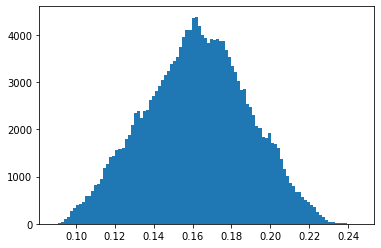

In [ ]:
# Predict probabilities for new data
y_test_pred_proba = best_estimator.predict_proba(X_test) # 확률로 추정된 X_test의 y_pred

plt.hist(y_test_pred_proba[:,1], bins=100)
plt.show() # y_test_pred_proba의 분포 확인

### 0, 1 count / confusion_matrix / accuracy, precision, recall, f1 score 

In [ ]:
def test_func(y_test, y_pred_proba, opt_threshold):
        
    # make Binarizer(y hat)
    binarizer = Binarizer(threshold = opt_threshold).fit(y_pred_proba[:,1].reshape(-1,1))
    custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

    # count 0, 1 in Binarizer(y hat)
    unique, counts = np.unique(custom_predict, return_counts=True)

    for val, count in zip(unique, counts):
        if len(unique) == 1:
            if val == 1.0:
                num_0_pred = count
                num_1_pred = 0
            elif val == 0.0:
                num_1_pred = count
                num_0_pred = 0
        if val == 1.0:
            num_0_pred = count
        elif val == 0.0:
            num_1_pred = count

    # count 0, 1 in y hat
    num_1_real = y_test.value_counts()[0]
    num_0_real = y_test.value_counts()[1]

    tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
    count = [tn, fp, fn, tp]
    tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

    result_df['result'] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]

#         labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    labels = ['TN','FP','FN','TP']

    # tn, fp, fn, tp 각각의 값을 counts 리스트에 저장
    counts = [tn, fp, fn, tp]

    # 그래프 그리기
    axes.bar(labels, counts)
    axes.set_title(threshold)
    axes.set_ylabel('Count')

    # 그래프 출력하기
    plt.show()
    
    cm = confusion_matrix(y_test, custom_predict)
    print('Confusion matrix:')
    print(cm)
    
    print(result_df)

In [ ]:
test_func(y_test, y_test_pred_proba, opt_threshold)

NameError: ignored

### ROC curve

In [ ]:
# Generate ROC curve and AUC score for the validation set
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1, label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

ValueError: ignored